# Evaluate Modified Algorithms - part 1

## BalancedBaggingClassifier

In [1]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import cohen_kappa_score
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [2]:
def simulate_dataset(n_samples=1000, weights=(0.01, 0.05, 0.05, 0.89), n_classes=4,
                   class_sep=0.9, n_clusters=1):
    X, y = make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=seed)
    return X, y

In [3]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT
# plot the decision function of a classifier given some data
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [4]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

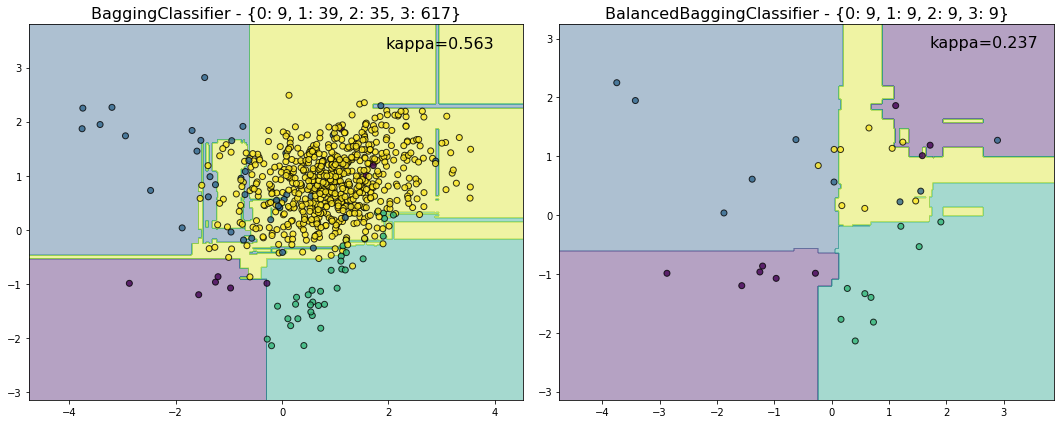

In [5]:
seed = 0
X, y = simulate_dataset()
# split dataset into training and test sets
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=seed)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
sampler = RandomUnderSampler(random_state=seed)   
clf1 = BaggingClassifier(random_state=seed)
clf2 = BalancedBaggingClassifier(random_state=seed)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# BaggingClassifier
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
plot_decision_function(X_train, y_train, clf1, ax1)
ax1.set_title('{} - {}'.format(
    clf1.__class__.__name__, dict(Counter(y_train))), fontsize=16)
ax1.text(4, 3.3, 'kappa={}'.format(round(kappa,3)),
        verticalalignment='bottom', horizontalalignment='right', fontsize=16)
# BalancedBaggingClassifier
clf2.fit(X_train, y_train)
X_res, y_res = sampler.fit_sample(X_train, y_train)
y_pred = clf2.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
plot_decision_function(X_res, y_res, clf2, ax2)
ax2.set_title('{} - {}'.format(
    clf2.__class__.__name__, dict(Counter(y_res))), fontsize=16)
ax2.text(3.6, 2.8, 'kappa={}'.format(round(kappa,3)),
        verticalalignment='bottom', horizontalalignment='right', fontsize=16)
fig.tight_layout()
plt.show()

Confusion matrix, without normalization
[[  4   0   0   0]
 [  1   9   1   5]
 [  1   0   9   5]
 [  0  12   6 247]]


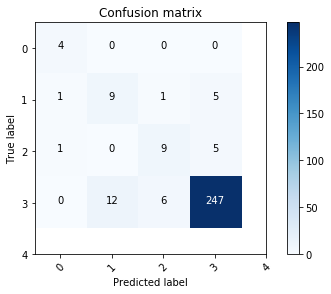

In [6]:
clf = BaggingClassifier(random_state=seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_matrix, classes=[0,1,2,3,4])
plt.show()

Confusion matrix, without normalization
[[  4   0   0   0]
 [  2  12   1   1]
 [  1   0  12   2]
 [ 39  57  17 152]]


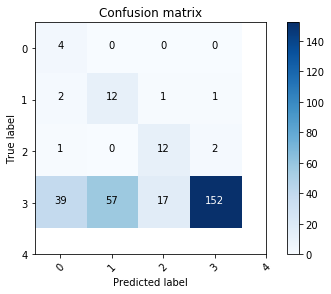

In [7]:
clf = BalancedBaggingClassifier(random_state=seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_matrix, classes=[0,1,2,3,4])
plt.show()

In [8]:
Counter(y_test)

Counter({0: 4, 1: 16, 2: 15, 3: 265})